In [4]:
import numpy as np
import pandas as pd
import geopandas
from geodatasets import get_path
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
df = pd.read_csv('dataset/Dataset .csv')

In [7]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
city_grouped = df.groupby('City')
locality_grouped = df.groupby('Locality')

In [10]:
city_stats = city_grouped.agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean',
    'Votes': 'mean'
}).rename(columns={
    'Restaurant ID': 'Restaurant Count',
    'Aggregate rating': 'Average Rating',
    'Price range': 'Average Price Range',
    'Votes': 'Average Votes'
}).reset_index()

In [11]:
city_stats

,City,Restaurant Count,Average Rating,Average Price Range,Average Votes
0,Abu Dhabi,20,4.300000,3.300000,302.250000
1,Agra,20,3.965000,2.650000,103.100000
2,Ahmedabad,21,4.161905,2.571429,584.095238
3,Albany,20,3.555000,1.700000,83.800000
4,Allahabad,20,3.395000,2.650000,69.600000
...,...,...,...,...,...
136,Weirton,1,3.900000,2.000000,156.000000
137,Wellington City,20,4.250000,3.250000,146.300000
138,Winchester Bay,1,3.200000,2.000000,16.000000
139,Yorkton,1,3.300000,2.000000,26.000000


In [12]:
locality_stats = locality_grouped.agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean',
    'Votes': 'mean'
}).rename(columns={
    'Restaurant ID': 'Restaurant Count',
    'Aggregate rating': 'Average Rating',
    'Price range': 'Average Price Range',
    'Votes': 'Average Votes'
}).reset_index()

In [13]:
locality_stats

,Locality,Restaurant Count,Average Rating,Average Price Range,Average Votes
0,"ILD Trade Centre Mall, Sohna Road",2,3.050000,1.500000,48.000000
1,"12th Square Building, Banjara Hills",1,4.300000,3.000000,3374.000000
2,"A Hotel, Gurdev Nagar",1,3.600000,2.000000,93.000000
3,"ARSS Mall, Paschim Vihar",1,3.100000,2.000000,117.000000
4,Aaya Nagar,1,0.000000,2.000000,2.000000
...,...,...,...,...,...
1203,"ibis New Delhi, Aerocity",2,1.550000,2.000000,4.500000
1204,�ayyolu,1,4.300000,2.000000,126.000000
1205,�guas Claras,3,3.666667,3.666667,15.666667
1206,�ukurambar,1,3.400000,2.000000,115.000000


In [14]:
most_restaurants_city = city_stats.sort_values('Restaurant Count', ascending=False).iloc[0]
print(f"City with most restaurants: {most_restaurants_city['City']} ({most_restaurants_city['Restaurant Count']} restaurants)")

City with most restaurants: New Delhi (5473 restaurants)


In [15]:
highest_rated_city = city_stats.sort_values('Average Rating', ascending=False).iloc[0]
print(f"Highest rated city: {highest_rated_city['City']} (Average Rating: {highest_rated_city['Average Rating']:.2f})")

Highest rated city: Inner City (Average Rating: 4.90)


/var/folders/pp/1c18q3_n1pg7zsqfmg8vnswh0000gn/T/ipykernel_4030/3300176065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_restaurants, x='Restaurant Count', y='City', palette='viridis')


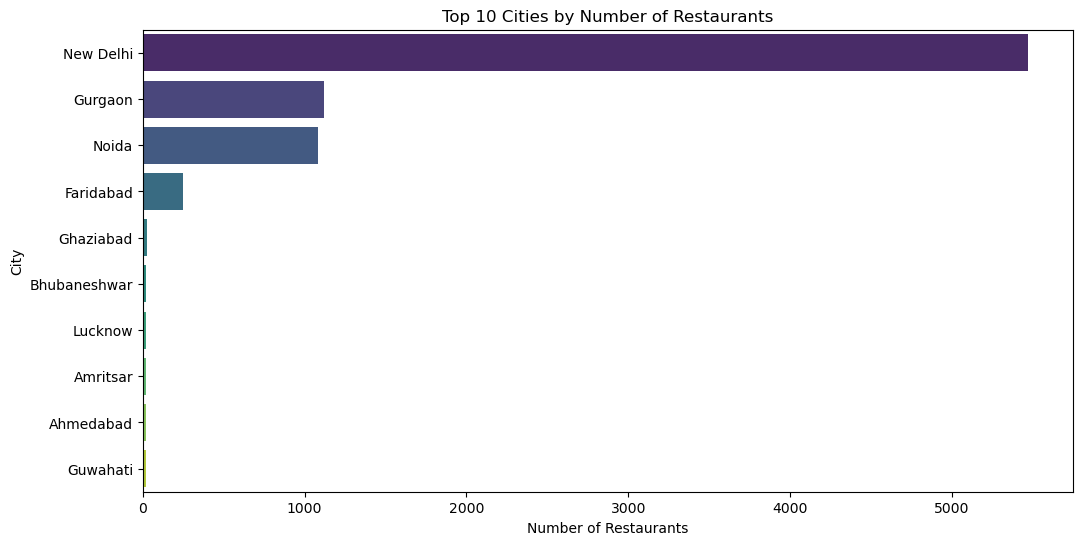

In [16]:
plt.figure(figsize=(12, 6))
most_restaurants = city_stats.sort_values('Restaurant Count', ascending=False).head(10)
sns.barplot(data=most_restaurants, x='Restaurant Count', y='City', palette='viridis')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

/var/folders/pp/1c18q3_n1pg7zsqfmg8vnswh0000gn/T/ipykernel_4030/1431395492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_localities, x='Average Rating', y='Locality', palette='coolwarm')


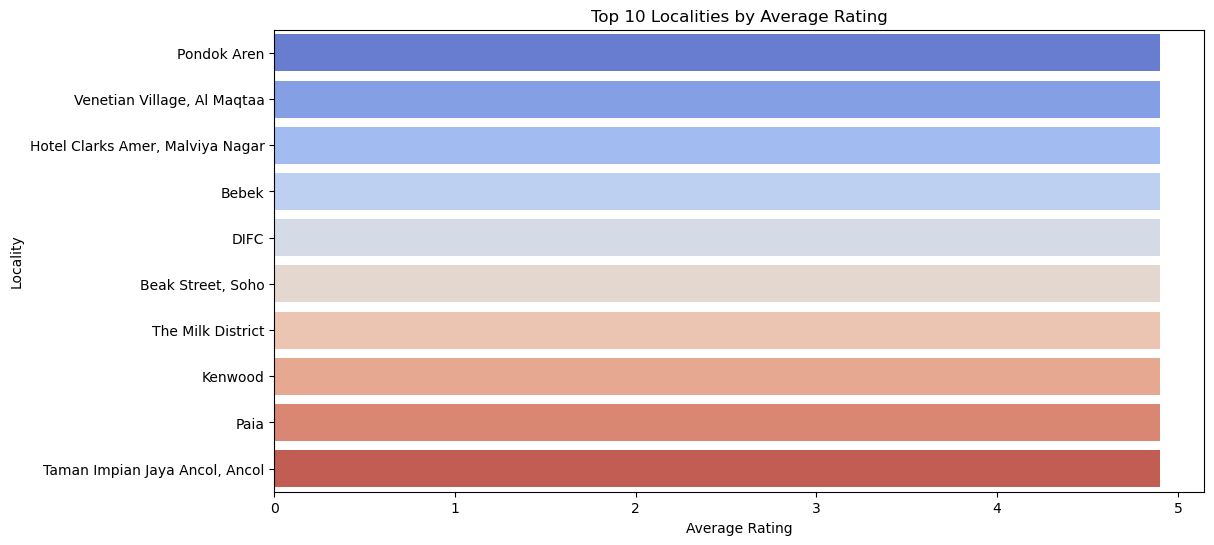

In [17]:
plt.figure(figsize=(12, 6))
top_localities = locality_stats.sort_values('Average Rating', ascending=False).head(10)
sns.barplot(data=top_localities, x='Average Rating', y='Locality', palette='coolwarm')
plt.title('Top 10 Localities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Locality')
plt.show()

In [18]:
cuisine_by_city = df.groupby('City')['Cuisines'].apply(lambda x: x.value_counts().head(3))
print("Top 3 cuisines by city:")
print(cuisine_by_city)

Top 3 cuisines by city:
City                                              
Abu Dhabi       American                              2
                Indian                                2
                Italian, Pizza                        2
Agra            North Indian, Mughlai                 5
                North Indian, Chinese, Continental    2
                                                     ..
Winchester Bay  Burger, Seafood, Steak                1
Yorkton         Asian                                 1
��stanbul       Cafe                                  3
                Restaurant Cafe                       2
                Desserts                              1
Name: Cuisines, Length: 322, dtype: int64


In [19]:
print(df[["Longitude" , "Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [20]:
gdf = geopandas.GeoDataFrame(df, geometry = geopandas.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")

In [21]:
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

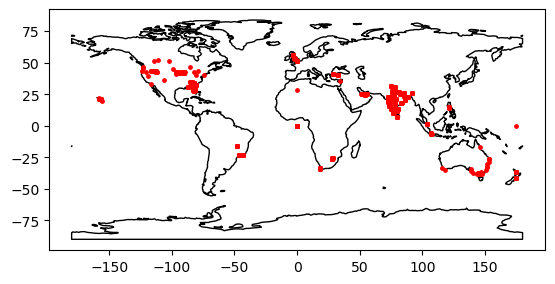

In [22]:
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.plot(color = 'White', edgecolor = 'black')
gdf.plot(ax = ax, marker = 'o',color ='red',markersize = 6)
plt.show()

In [23]:
world_map = folium.Map(location = [df['Latitude'].mean(),df['Longitude'].mean()], zoom_start = 1 ,height = '100%',width = '100%')

In [24]:
heat_marker = [[row['Latitude'], row['Longitude'] ]for i,row in df.iterrows()]
HeatMap(heat_marker, radius = 10).add_to(world_map)

In [25]:
world_map